In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df_test = pd.read_csv("../data/test.csv")
df_store = pd.read_csv("../data/store.csv")
df_train = pd.read_csv("../data/train.csv")

C:\Users\wasihunt\AppData\Local\Temp\ipykernel_9124\1736236737.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("../data/train.csv")


In [3]:
df_test.sample(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
11794,11795,864,5,2015-09-04,1.0,1,0,1
36483,36484,690,4,2015-08-06,1.0,1,0,1
13472,13473,819,3,2015-09-02,1.0,1,0,0
9241,9242,884,1,2015-09-07,1.0,0,0,1
30219,30220,338,4,2015-08-13,1.0,0,0,1
40019,40020,835,7,2015-08-02,0.0,0,0,0
8444,8445,955,2,2015-09-08,1.0,0,0,0
31030,31031,280,3,2015-08-12,1.0,0,0,1
21830,21831,557,7,2015-08-23,0.0,0,0,0
4579,4580,391,6,2015-09-12,1.0,0,0,0


In [4]:
print(f"Test data minimum date: {df_test['Date'].min()}")
print(f"Test data maximum data: {df_test['Date'].max()}")

Test data minimum date: 2015-08-01
Test data maximum data: 2015-09-17


In [5]:
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [6]:
df_test['Open'] =df_test['Open'].fillna(df_test['Open'].mode()[0])

In [7]:
df_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
df_test.shape

(41088, 8)

In [9]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
df_store['Promo2SinceWeek'] = np.where(df_store['Promo2']== 0, 'UNKNOWN',df_store['Promo2SinceWeek'])
df_store['Promo2SinceYear'] = np.where(df_store['Promo2']== 0, 'UNKNOWN',df_store['Promo2SinceYear'])
df_store['PromoInterval'] = np.where(df_store['Promo2']== 0, 'UNKNOWN',df_store['PromoInterval'])
df_store['CompetitionDistance'] = df_store['CompetitionDistance'].fillna('No Competition')
df_store['CompetitionOpenSinceMonth'] = df_store['CompetitionOpenSinceMonth'].fillna('UNKNOWN')
df_store['CompetitionOpenSinceYear'] = df_store['CompetitionOpenSinceYear'].fillna('UNKNOWN')

In [11]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,UNKNOWN,UNKNOWN,UNKNOWN
4,5,a,a,29910.0,4.0,2015.0,0,UNKNOWN,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,UNKNOWN,UNKNOWN,UNKNOWN
1112,1113,a,c,9260.0,UNKNOWN,UNKNOWN,0,UNKNOWN,UNKNOWN,UNKNOWN
1113,1114,a,c,870.0,UNKNOWN,UNKNOWN,0,UNKNOWN,UNKNOWN,UNKNOWN


In [12]:
df_store['Promo2SinceWeek'].isnull().sum()

np.int64(0)

In [13]:
df_store.shape

(1115, 10)

In [14]:
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [15]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
df_train.shape

(1017209, 9)

In [17]:
print(f"Test data minimum date: {df_train['Date'].min()}")
print(f"Test data maximum data: {df_train['Date'].max()}")

Test data minimum date: 2013-01-01
Test data maximum data: 2015-07-31


In [18]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [19]:
df_test_merged = pd.merge(df_store, df_test, on='Store')
df_test_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,1,4,2015-09-17,1.0,1,0,0
1,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,857,3,2015-09-16,1.0,1,0,0
2,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,1713,2,2015-09-15,1.0,1,0,0
3,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,2569,1,2015-09-14,1.0,1,0,0
4,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,3425,7,2015-09-13,0.0,0,0,0


In [20]:
df_train_merged = pd.merge(df_store, df_train, on='Store')
df_train_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,1,2015-07-27,6102,612,1,1,0,1


In [21]:
df_train_merged.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

<Axes: xlabel='Sales'>

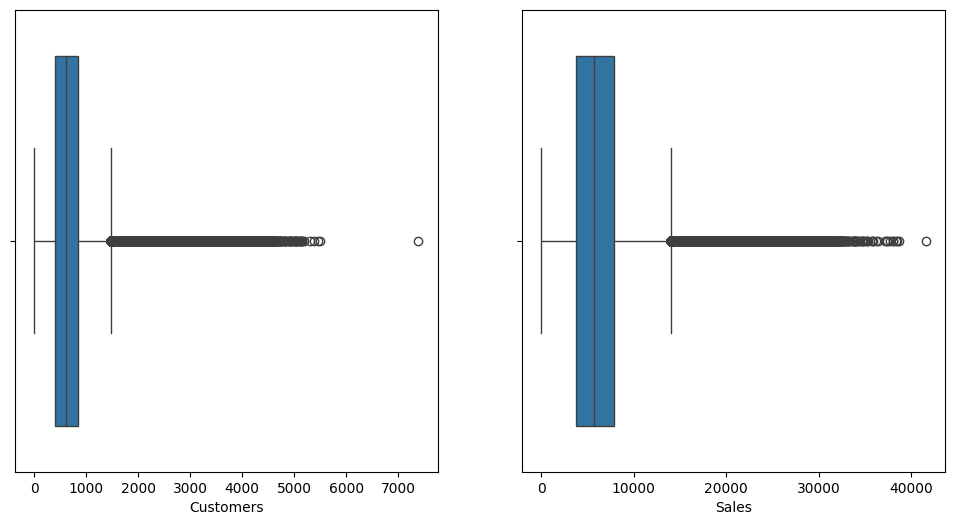

In [33]:
## Let's Check for outliers in Sales and Customers column since they are the only useful columns

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(data=df_train_merged, x=df_train_merged['Customers'],ax=ax[0])
sns.boxplot(data=df_train_merged, x=df_train_merged['Sales'],ax=ax[1])

In [39]:
### Handle Outliers

def handle_outliers(df):
    columns = ['Sales', 'Customers']
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        df[col] = np.where(((df[col] <= lower_bound) | (df[col] >= upper_bound)), df[col].mean(), df[col])

    return df

In [40]:
handle_outliers(df_train_merged)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,5,2015-07-31,5263.0,555.0,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,4,2015-07-30,5020.0,546.0,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,3,2015-07-29,4782.0,523.0,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,2,2015-07-28,5011.0,560.0,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,1,2015-07-27,6102.0,612.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,UNKNOWN,UNKNOWN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771.0,339.0,1,0,0,1
1017205,1115,d,c,5350.0,UNKNOWN,UNKNOWN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540.0,326.0,1,0,0,1
1017206,1115,d,c,5350.0,UNKNOWN,UNKNOWN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297.0,300.0,1,0,0,1
1017207,1115,d,c,5350.0,UNKNOWN,UNKNOWN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697.0,305.0,1,0,0,1


<Axes: xlabel='Sales'>

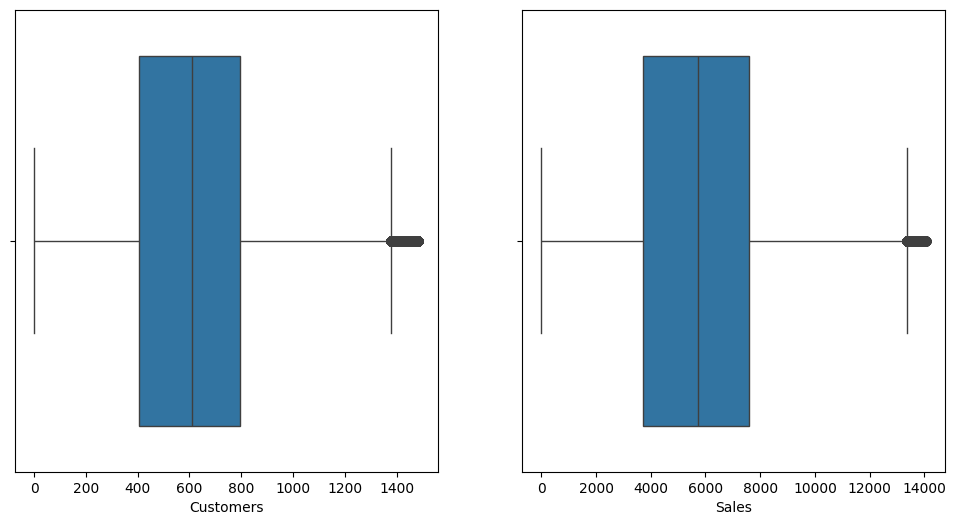

In [41]:
## Let's Check for outliers in Sales and Customers column since they are the only useful columns

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(data=df_train_merged, x=df_train_merged['Customers'],ax=ax[0])
sns.boxplot(data=df_train_merged, x=df_train_merged['Sales'],ax=ax[1])

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(data=df_train_merged, x=df_train_merged['Customers'],ax=ax[0])
sns.boxplot(data=df_train_merged, x=df_train_merged['Sales'],ax=ax[1])